<a href="https://colab.research.google.com/github/sc7-cloud/TFG---GOOGLE-COLAB-C-DIGOS-/blob/main/Analisis_bases_de_datos_canciones_Versi%C3%B3n_14_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd


file_path = '/content/CANCIONES.xlsx'
df_canciones = pd.read_excel(file_path)


print(df_canciones.head())


                  Nombre Canción                                 Artistas  \
0                      Gata Only                      FloyyMenor, Cris Mj   
1                   HOLA PERDIDA                            Luck Ra, KHEA   
2  Una Foto Remix (feat. Emilia)  Mesita, Nicki Nicole, Tiago PZK, Emilia   
3                           Piel                 Tiago PZK, Ke Personajes   
4                 Por Mil Noches                                   Airbag   

   Artista ID              Spotify ID  Posición Diaria  Movimiento Diario   \
0        1016  6XjDF6nds4DE2BBbagZol6                1                   1   
1        2001  7JKptWv4YXmievid0HajID                2                  -1   
2        2002  1kqH58eGh2ZTOHwqBIB2tM                3                   0   
3        2003  4wS0TnQzVkY9ML1BPKpOk1                4                   0   
4        2004  10zSgbysU2KyVTrcRmtu62               39                   9   

   Movimiento Semanal  País fecha dato registrado  Popularidad  ... 

La columna Bailabilidad tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Energía tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Volumen tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Nivel Hablado tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Acústica tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Viveza tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Valencia tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
   Bailabilidad   Energía   Volumen  Nivel Hablado  Acústica    Viveza  \
0      0.582774  0.404798  6.569709       0.049647  0.368801  0.086086   
1      0.393393  0.583332  6.317347       0.082409  0.167208  0.556181   
2      0.565314  0.532391  5.996094       0.061189  0.272315  0.075478   
3      0.498348  0.645531  5.434974       0.057608  0.352064  0.131028   
4      0.440832  0.514021  6.485239       0.028685  0.0167

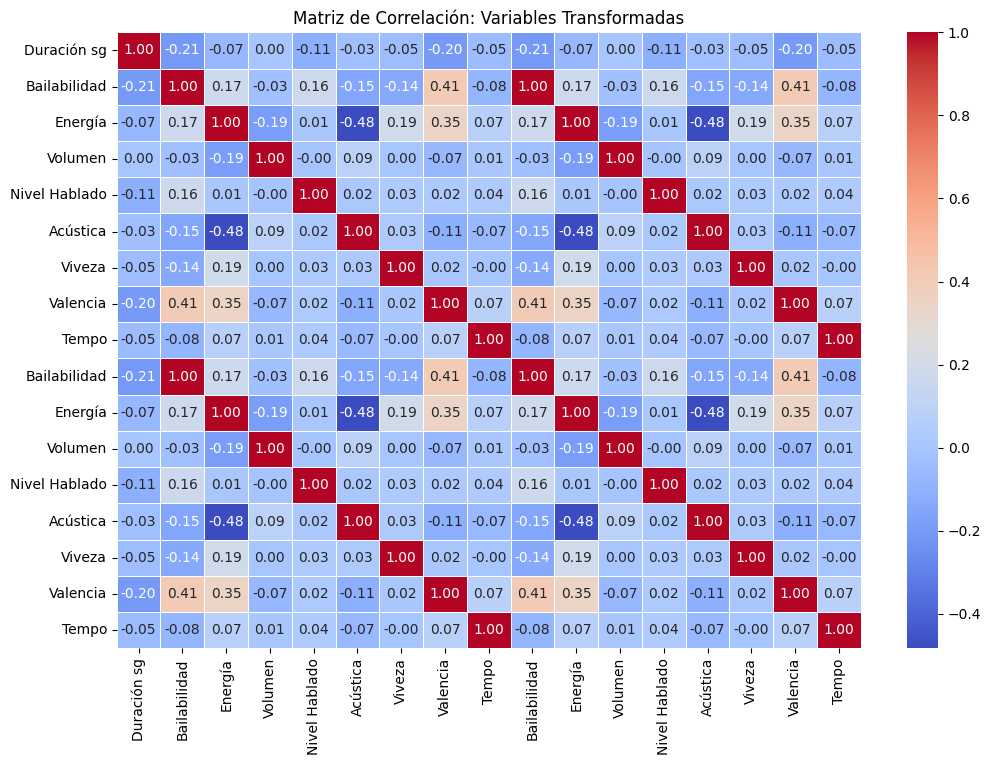

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


df_canciones = pd.read_excel('/content/CANCIONES.xlsx')


numerical_columns = ['Duración sg', 'Bailabilidad', 'Energía',
                     'Volumen', 'Nivel Hablado', 'Acústica',
                     'Viveza', 'Valencia', 'Tempo']


df_canciones['Volumen'] = np.abs(df_canciones['Volumen'])
df_canciones['Volumen'], _ = stats.boxcox(df_canciones['Volumen'] + 1)


log_columns = ['Duración sg', 'Bailabilidad', 'Energía', 'Volumen', 'Nivel Hablado',
               'Acústica','Viveza', 'Valencia', 'Tempo']

for col in log_columns:

    df_canciones[col] = df_canciones[col].apply(lambda x: np.log1p(x) if x > 0 else np.nan)


boxcox_columns = ['Bailabilidad', 'Energía', 'Volumen', 'Nivel Hablado', 'Acústica',
                 'Viveza', 'Valencia', 'Tempo']


for col in boxcox_columns:

    if df_canciones[col].min() > 0.1:
        try:

            df_canciones[col], _ = stats.boxcox(df_canciones[col] + 1)
        except Exception as e:
            print(f"Error al aplicar Box-Cox en {col}: {e}")
    else:
        print(f"La columna {col} tiene valores menores o iguales a 0.1 y no se aplica Box-Cox")


print(df_canciones[boxcox_columns].head())


correlation_matrix = df_canciones[log_columns + boxcox_columns].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación: Variables Transformadas')
plt.show()



La columna Bailabilidad tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Energía tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Volumen tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Nivel Hablado tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Acústica tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Viveza tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Valencia tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
Estadísticas Descriptivas de las Variables Transformadas:
         Duración sg   Bailabilidad        Energía        Volumen  \
count  214974.000000  214974.000000  214974.000000  214974.000000   
mean        1.827453       0.414541       0.411211       9.196208   
std         0.036787       0.055226       0.068591       1.930742   
min         1.534194       0.061689       0.000020       0.005031   
25%         1.805236     

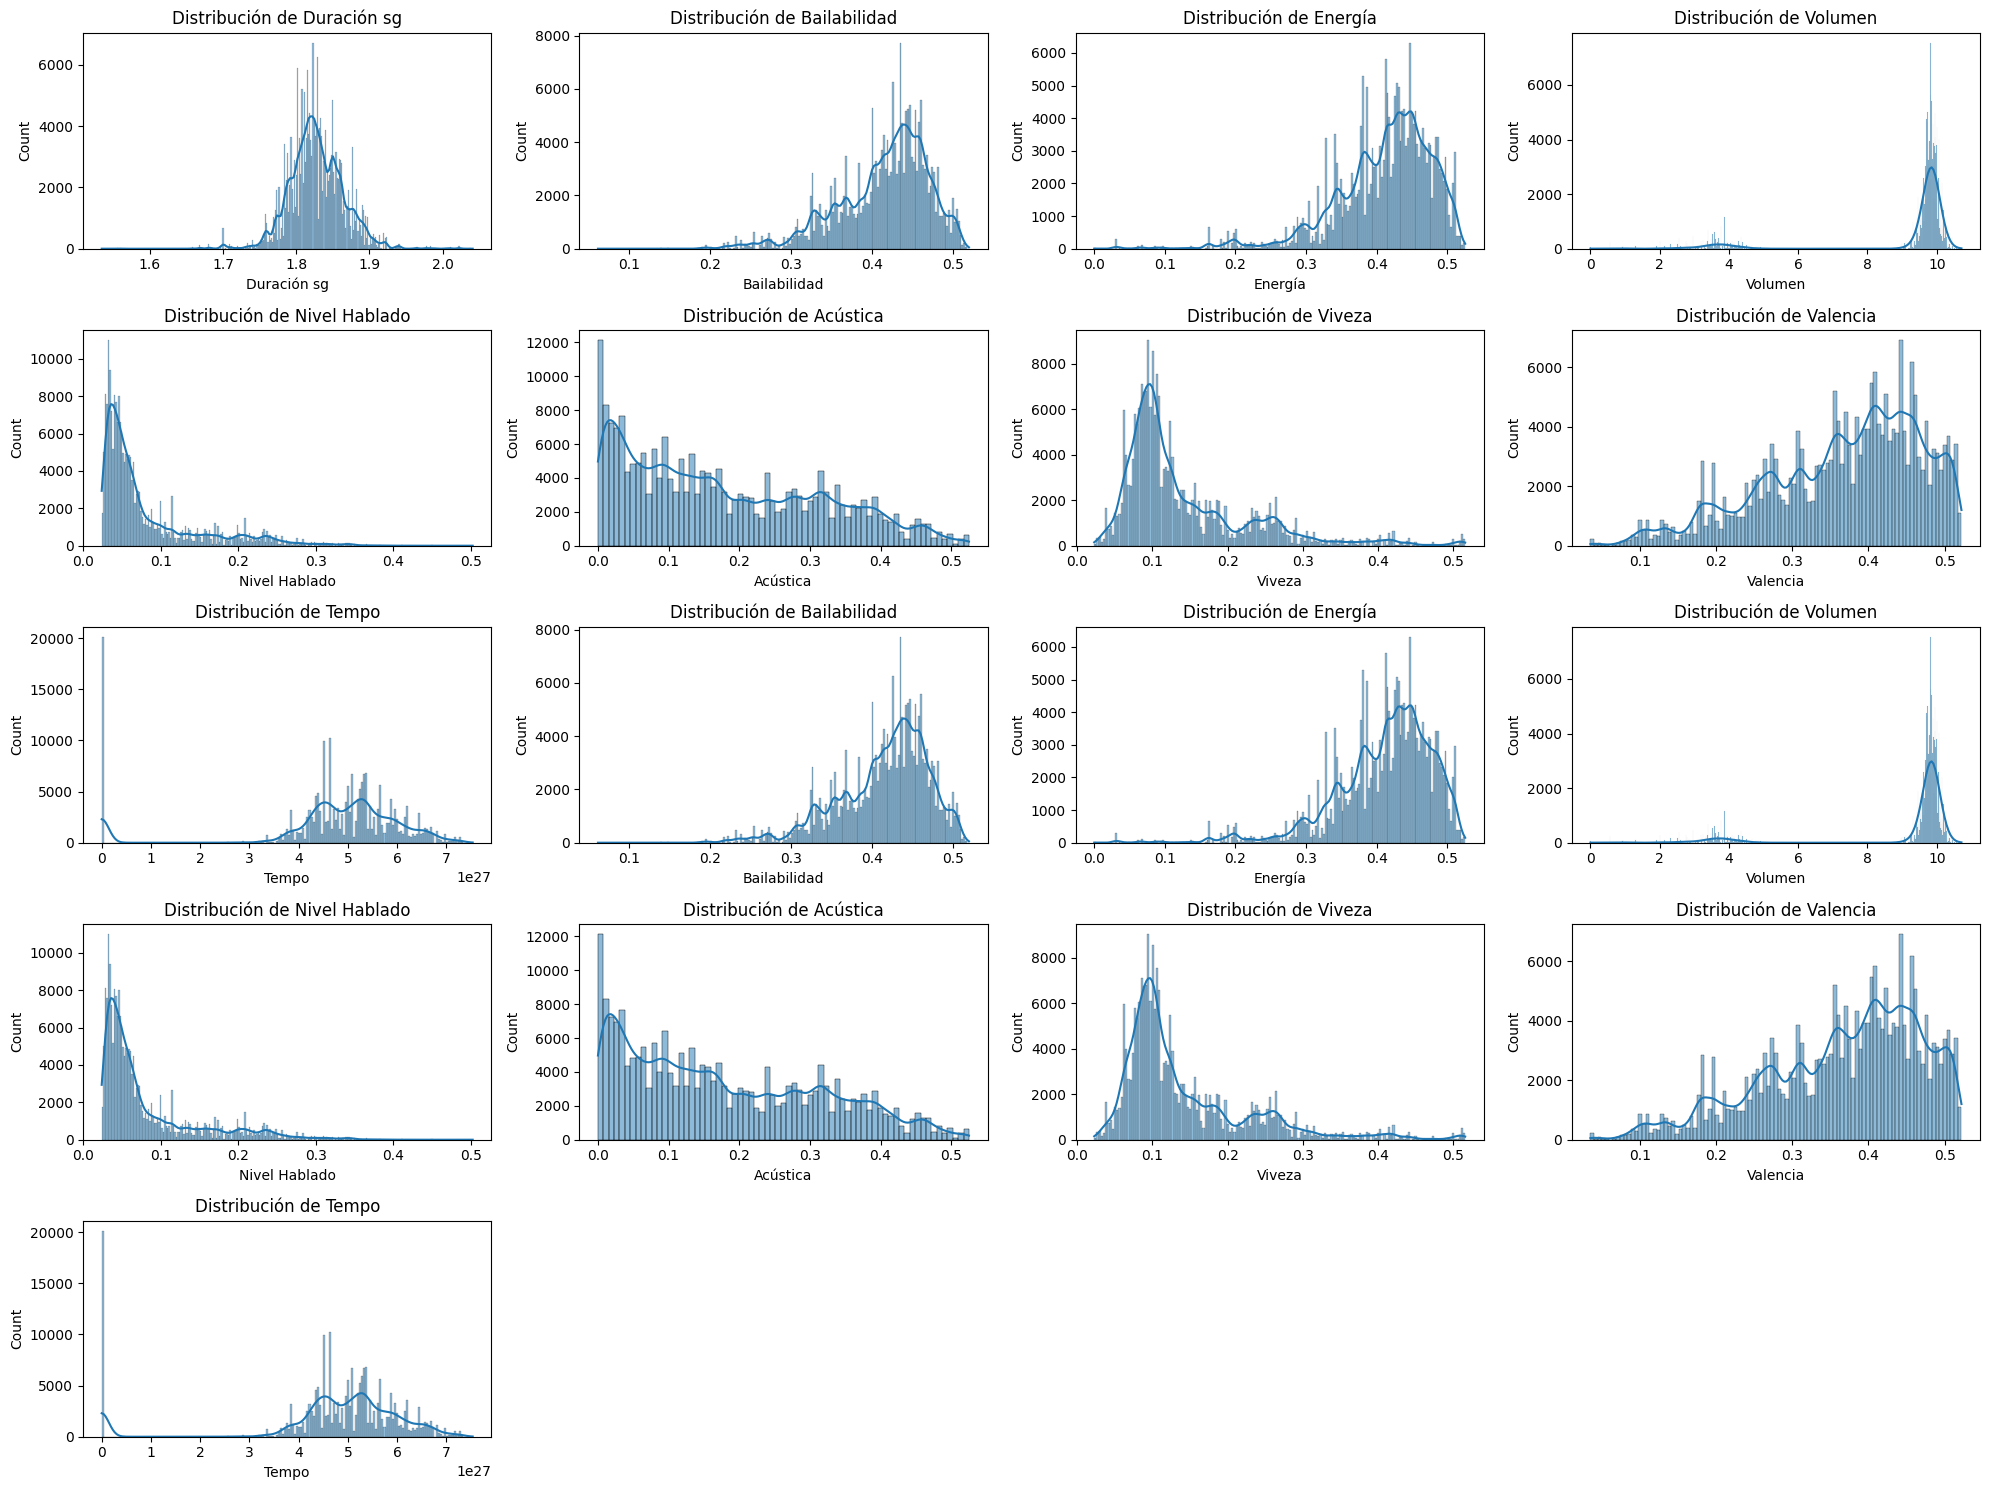

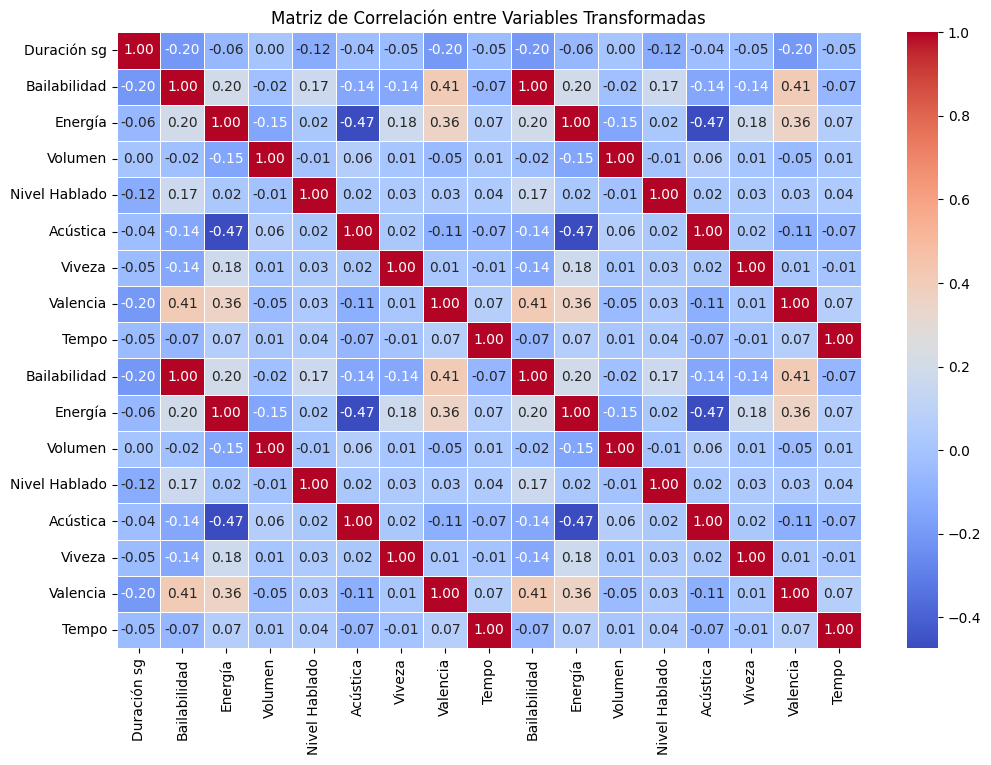


Valores Nulos después de las Transformaciones:
Duración sg      0
Bailabilidad     0
Energía          0
Volumen          0
Nivel Hablado    0
Acústica         0
Viveza           0
Valencia         0
Tempo            0
Bailabilidad     0
Energía          0
Volumen          0
Nivel Hablado    0
Acústica         0
Viveza           0
Valencia         0
Tempo            0
dtype: int64


In [ ]:



numerical_columns = ['Duración sg', 'Bailabilidad', 'Energía',
                     'Volumen', 'Nivel Hablado', 'Acústica',
                     'Viveza', 'Valencia', 'Tempo']


df_canciones['Volumen'] = np.abs(df_canciones['Volumen'])
df_canciones['Volumen'], _ = stats.boxcox(df_canciones['Volumen'] + 1)


log_columns = ['Duración sg', 'Bailabilidad', 'Energía', 'Volumen', 'Nivel Hablado',
               'Acústica','Viveza', 'Valencia', 'Tempo']

for col in log_columns:

    df_canciones[col] = df_canciones[col].apply(lambda x: np.log1p(x) if x > 0 else np.nan)


boxcox_columns = ['Bailabilidad', 'Energía', 'Volumen', 'Nivel Hablado', 'Acústica',
                 'Viveza', 'Valencia', 'Tempo']


for col in boxcox_columns:

    if df_canciones[col].min() > 0.1:
        try:

            df_canciones[col], _ = stats.boxcox(df_canciones[col] + 1)
        except Exception as e:
            print(f"Error al aplicar Box-Cox en {col}: {e}")
    else:
        print(f"La columna {col} tiene valores menores o iguales a 0.1 y no se aplica Box-Cox")


print("Estadísticas Descriptivas de las Variables Transformadas:")
print(df_canciones[log_columns + boxcox_columns].describe())


plt.figure(figsize=(20, 15))

for i, col in enumerate(log_columns + boxcox_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df_canciones[col], kde=True)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()


correlation_matrix = df_canciones[log_columns + boxcox_columns].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Transformadas')
plt.show()


print("\nValores Nulos después de las Transformaciones:")
print(df_canciones[log_columns + boxcox_columns].isnull().sum())


In [ ]:


numerical_columns = ['Duración sg', 'Bailabilidad', 'Energía',
                     'Volumen', 'Nivel Hablado', 'Acústica',
                     'Viveza', 'Valencia', 'Tempo']


df_canciones['Volumen'] = np.abs(df_canciones['Volumen'])
df_canciones['Volumen'], _ = stats.boxcox(df_canciones['Volumen'] + 1)


log_columns = ['Duración sg', 'Bailabilidad', 'Energía', 'Volumen', 'Nivel Hablado',
               'Acústica','Viveza', 'Valencia', 'Tempo']

for col in log_columns:

    df_canciones[col] = df_canciones[col].apply(lambda x: np.log1p(x) if x > 0 else np.nan)


boxcox_columns = ['Bailabilidad', 'Energía', 'Volumen', 'Nivel Hablado', 'Acústica',
                 'Viveza', 'Valencia', 'Tempo']


for col in boxcox_columns:

    if df_canciones[col].min() > 0.1:
        try:

            df_canciones[col], _ = stats.boxcox(df_canciones[col] + 1)
        except Exception as e:
            print(f"Error al aplicar Box-Cox en {col}: {e}")
    else:
        print(f"La columna {col} tiene valores menores o iguales a 0.1 y no se aplica Box-Cox")



df_statistics = df_canciones[log_columns + boxcox_columns].describe().T
df_statistics.reset_index(inplace=True)
df_statistics.columns = ['Variable', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']


import pandas as pd
display(df_statistics)



La columna Bailabilidad tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Energía tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Volumen tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Nivel Hablado tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Acústica tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Viveza tiene valores menores o iguales a 0.1 y no se aplica Box-Cox
La columna Valencia tiene valores menores o iguales a 0.1 y no se aplica Box-Cox


/usr/local/lib/python3.11/dist-packages/scipy/stats/_morestats.py:1120: UserWarning: The optimal lambda is 252.02212646397993, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,Variable,Count,Mean,Std,Min,25%,50%,75%,Max
0,Duración sg,214974.0,0.712582,0.006381,6.574556e-01,7.087683e-01,7.120980e-01,7.165708e-01,7.477229e-01
1,Bailabilidad,214974.0,0.296705,0.030110,5.813810e-02,2.816213e-01,3.037403e-01,3.178834e-01,3.493456e-01
2,Energía,214974.0,0.294313,0.039065,2.009919e-05,2.780958e-01,3.029431e-01,3.198380e-01,3.521109e-01
3,Volumen,214974.0,41.307581,2.887204,5.289904e-03,4.202729e+01,4.213213e+01,4.221485e+01,4.266257e+01
4,Nivel Hablado,214974.0,0.072076,0.051692,2.308697e-02,3.705448e-02,5.113269e-02,8.769910e-02,3.415518e-01
5,Acústica,214974.0,0.140924,0.097124,7.529887e-06,5.362496e-02,1.298871e-01,2.238724e-01,3.521109e-01
6,Viveza,214974.0,0.120684,0.060563,2.217495e-02,8.029765e-02,9.841322e-02,1.496358e-01,3.477975e-01
7,Valencia,214974.0,0.267246,0.060710,3.403025e-02,2.320716e-01,2.825472e-01,3.127747e-01,3.507361e-01
8,Tempo,214974.0,inf,inf,8.226755e+301,1.388532e+304,1.481451e+304,1.563225e+304,1.797693e+304
9,Bailabilidad,214974.0,0.296705,0.030110,5.813810e-02,2.816213e-01,3.037403e-01,3.178834e-01,3.493456e-01


In [ ]:

nulos = df_canciones.isnull().sum()


print(nulos)


nulos_columnas = nulos[nulos > 0]
print(nulos_columnas)


Nombre Canción             0
Artistas                   0
Artista ID                 0
Spotify ID                 0
Posición Diaria            0
Movimiento Diario          0
Movimiento Semanal         0
País                       0
fecha dato registrado      0
Popularidad                0
Explícito                  0
Duración sg                0
Nombre del Album           0
Fecha Lanzamiento Album    0
Bailabilidad               0
Energía                    0
Tono                       0
Volumen                    0
Modo                       0
Nivel Hablado              0
Acústica                   0
Instrumentalidad           0
Viveza                     0
Valencia                   0
Tempo                      0
Compás                     0
dtype: int64
Series([], dtype: int64)


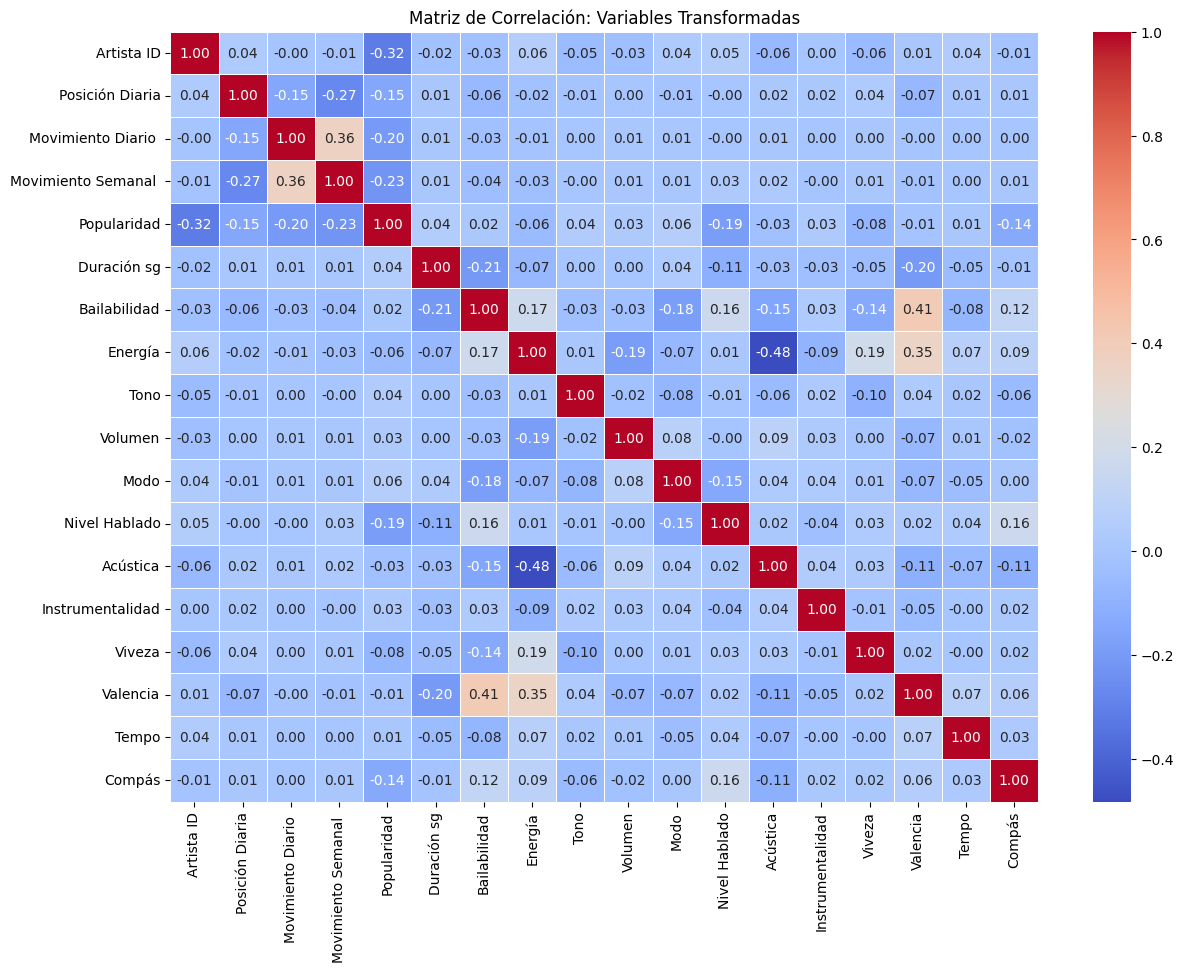

In [ ]:

numeric_columns = df_canciones.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_columns.corr()


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación: Variables Transformadas')
plt.show()



In [ ]:
import numpy as np
from scipy import stats


boxcox_columns = ['Bailabilidad', 'Energía', 'Tono', 'Volumen', 'Nivel Hablado', 'Acústica',
                  'Instrumentalidad', 'Viveza', 'Valencia', 'Tempo', 'Compás']


for col in boxcox_columns:

    if df_canciones[col].min() > 0 and df_canciones[col].nunique() > 1:
        try:

            df_canciones[col], _ = stats.boxcox(df_canciones[col] + 1)
        except Exception as e:
            print(f"Error al aplicar Box-Cox en {col}: {e}")
    else:
        print(f"La columna {col} no es adecuada para Box-Cox")


print(df_canciones[boxcox_columns].head())

Error al aplicar Box-Cox en Tono: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
Error al aplicar Box-Cox en Instrumentalidad: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
   Bailabilidad   Energía      Tono       Volumen  Nivel Hablado  Acústica  \
0      2.640667  1.082246  2.197225  23245.730807       0.034259  0.222283   
1      1.101869  2.369880  1.098612  19066.551775       0.045985  0.129712   
2      2.452436  1.922683  1.945910  14666.125976       0.039073  0.184066   
3      1.826519  3.022074       NaN   8997.811627       0.037670  0.216300   
4      1.395234  1.778561  0.693147  21769.910351       0.022974  0.016301   

   Instrumentalidad    Viveza  Valencia         Tempo        Compás  
0          0.000024  0.059775  0.858668  7.122576e+09  20067.976693  
1               NaN  0.117421  0.717011  1.000755e+10  20067.976693  
2               NaN  0.054622  0.963247  

In [ ]:

numerical_columns = ['Posición Diaria', 'Movimiento Diario ', 'Movimiento Semanal ', 'Popularidad',
                     'Duración sg', 'Bailabilidad', 'Energía', 'Tono', 'Volumen', 'Modo',
                     'Nivel Hablado', 'Acústica', 'Instrumentalidad', 'Viveza', 'Valencia',
                     'Tempo', 'Compás']


df_canciones[numerical_columns].describe()


,Posición Diaria,Movimiento Diario,Movimiento Semanal,Popularidad,Duración sg,Bailabilidad,Energía,Tono,Volumen,Modo,Nivel Hablado,Acústica,Instrumentalidad,Viveza,Valencia,Tempo,Compás
count,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000
mean,25.496404,1.098407,2.889001,78.236354,189.456599,0.680707,0.676731,5.535604,-5409.722795,0.559123,0.094100,0.246964,0.010419,0.177798,0.582176,111543.010393,3.899783
std,14.430689,7.445979,12.414976,12.733359,47.561570,0.133300,0.158592,3.611048,2903.586214,0.496493,0.089821,0.225489,0.070772,0.142229,0.218686,44398.576425,0.384846
min,1.000000,-43.000000,-46.000000,0.000000,37.000000,0.065700,0.000020,0.000000,-31321.000000,0.000000,0.024200,0.000008,0.000000,0.023200,0.036500,63.050000,1.000000
25%,13.000000,-1.000000,-3.000000,71.000000,160.000000,0.598000,0.583000,2.000000,-6909.000000,0.000000,0.040000,0.060000,0.000000,0.095400,0.416000,96372.000000,4.000000
50%,25.000000,0.000000,0.000000,79.000000,180.000000,0.701000,0.697000,6.000000,-5413.000000,1.000000,0.056900,0.174000,0.000000,0.122000,0.602000,117038.000000,4.000000
75%,38.000000,2.000000,5.000000,87.000000,212.000000,0.776000,0.787000,9.000000,-4028.000000,1.000000,0.106000,0.391000,0.000024,0.211000,0.748000,138008.000000,4.000000
max,50.000000,49.000000,49.000000,100.000000,810.000000,0.975000,0.995000,11.000000,3233.000000,1.000000,0.921000,0.995000,0.954000,0.964000,0.985000,215338.000000,5.000000


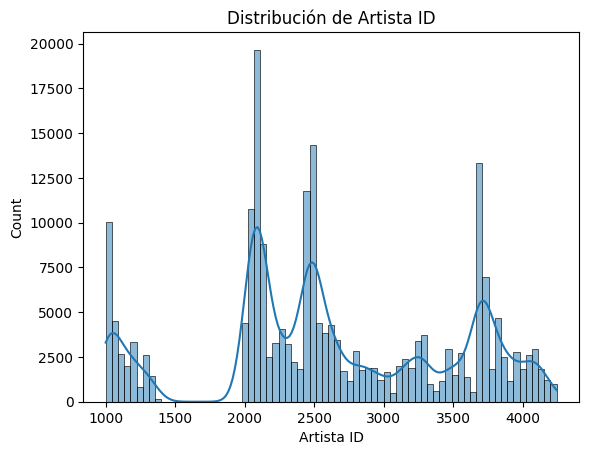

Artista ID - Skew: -0.055762409297740706


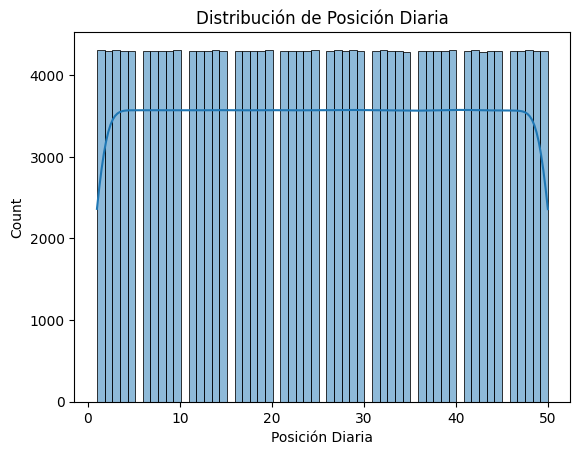

Posición Diaria - Skew: 0.00023905745807723542


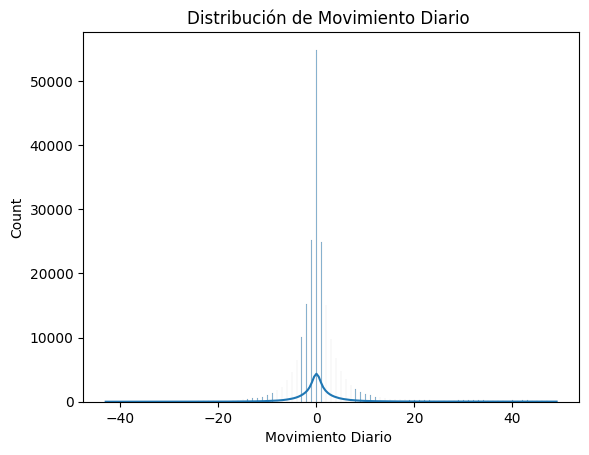

Movimiento Diario  - Skew: 2.8897331023540564


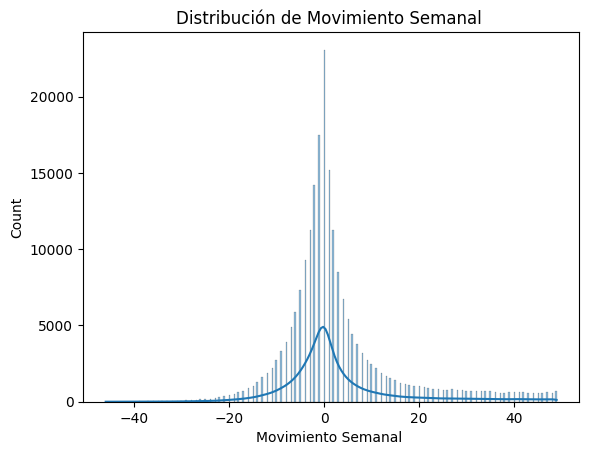

Movimiento Semanal  - Skew: 1.5221675573908016


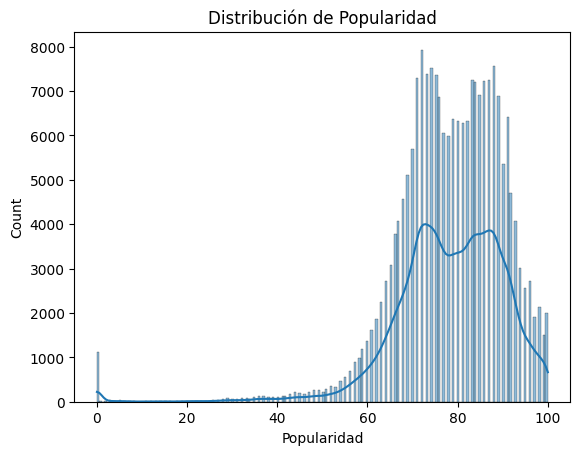

Popularidad - Skew: -1.788902780468116


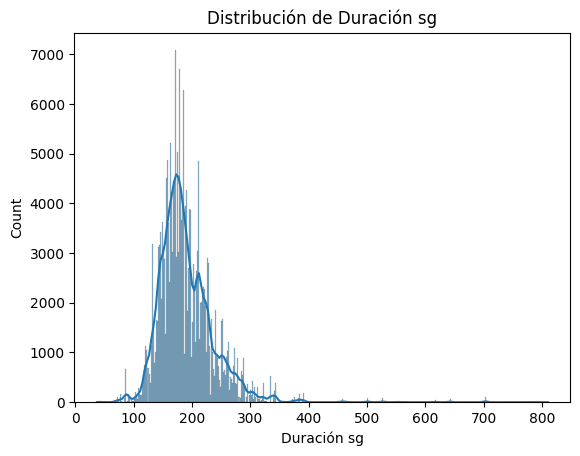

Duración sg - Skew: 2.203031062506786


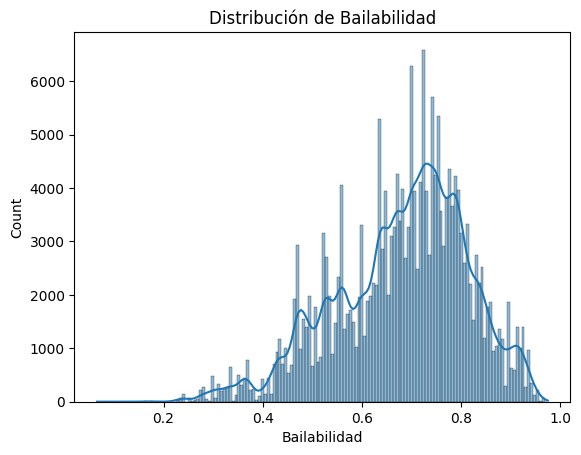

Bailabilidad - Skew: -0.5391781261596158


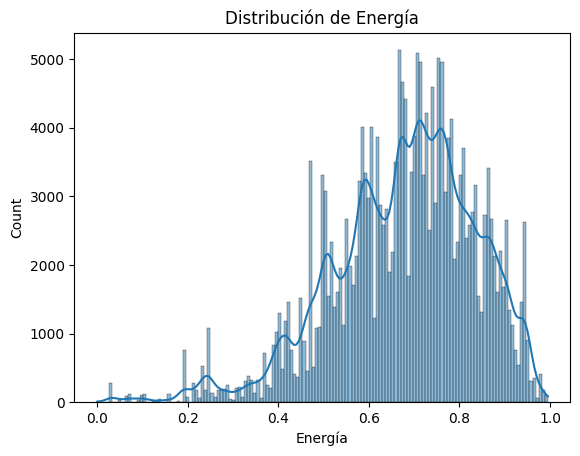

Energía - Skew: -0.6898023826371312


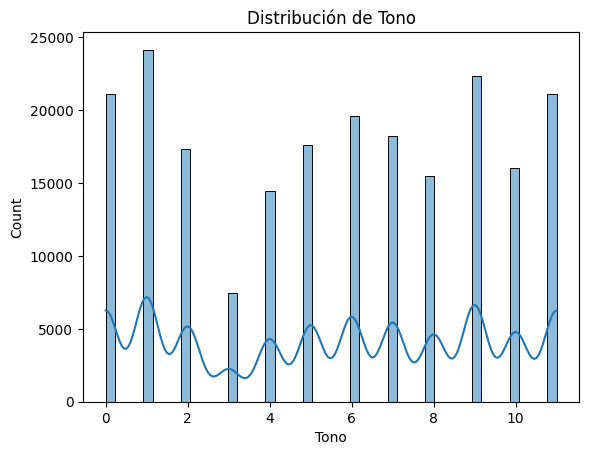

Tono - Skew: -0.06750697066378138


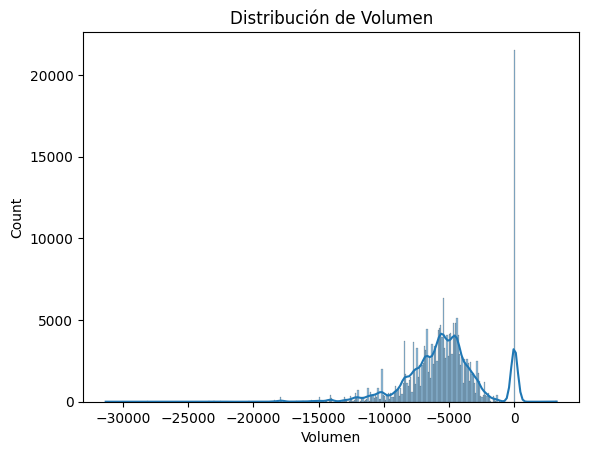

Volumen - Skew: -0.5289956137504708


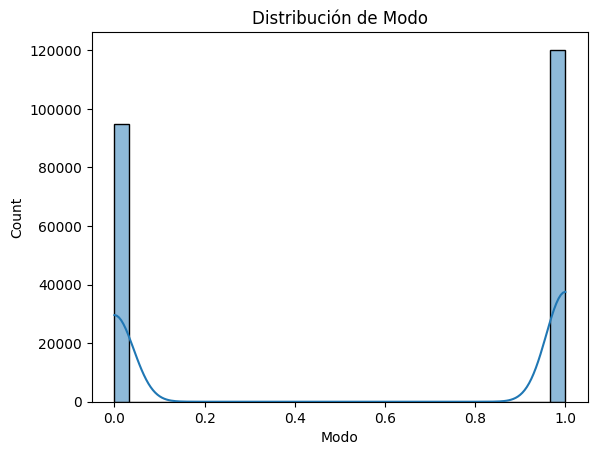

Modo - Skew: -0.23816628561897793


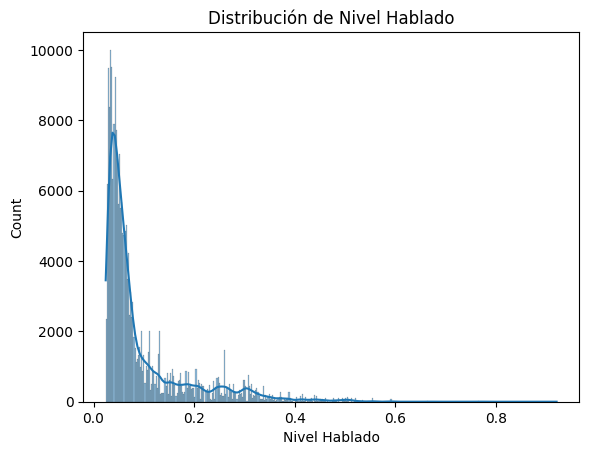

Nivel Hablado - Skew: 2.1950261963930946


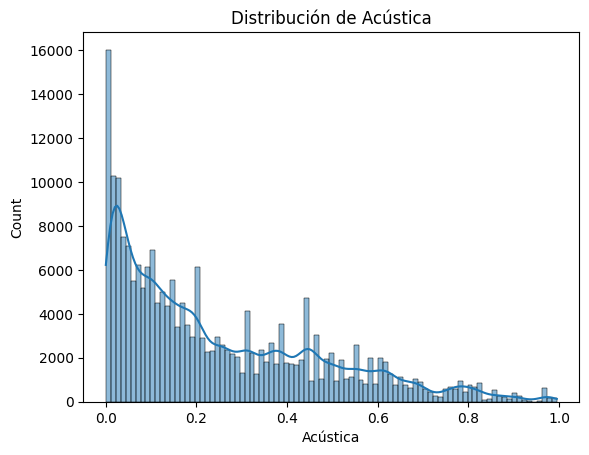

Acústica - Skew: 0.9779298748026549


KeyboardInterrupt: 

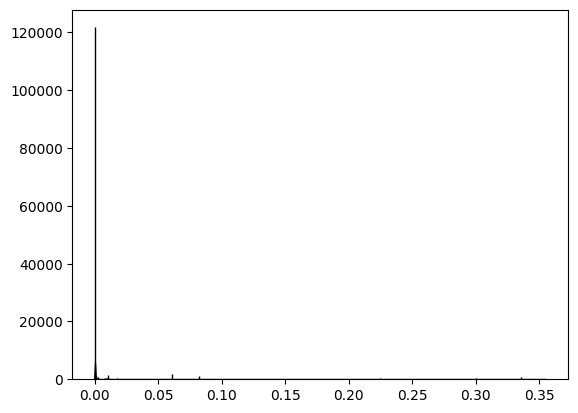

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler



numerical_columns = df_canciones.select_dtypes(include=['float64', 'int64']).columns.tolist()


def check_distribution(df, columns):
    for column in columns:
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribución de {column}')
        plt.show()
        print(f'{column} - Skew: {df[column].skew()}')


check_distribution(df_canciones, numerical_columns)


In [ ]:

df_canciones['Volumen'] = np.log1p(np.abs(df_canciones['Volumen']))


print(df_canciones[['Volumen']].head())

    Volumen
0  9.044640
1  8.676246
2  8.207402
3  7.388946
4  8.921324


In [ ]:
import numpy as np


df_canciones['Popularidad'] = np.log1p(df_canciones['Popularidad'])
df_canciones['Volumen'] = np.log1p(df_canciones['Volumen'])
df_canciones['Bailabilidad'] = np.log1p(df_canciones['Bailabilidad'])



df_canciones['Modo'] = df_canciones['Modo'].astype('category')


In [ ]:

print("Muestra de valores antes de la transformación:")
print(df_canciones.head())




print("\nRevisión de las columnas con posibles valores negativos o cero antes de aplicar logaritmos:")
print(df_canciones[['Posición Diaria', 'Movimiento Diario ', 'Movimiento Semanal ',
                    'Popularidad', 'Duración sg', 'Bailabilidad', 'Energía',
                    'Tono', 'Volumen', 'Modo', 'Nivel Hablado', 'Acústica',
                    'Instrumentalidad', 'Viveza', 'Valencia', 'Tempo', 'Compás']].describe())


Muestra de valores antes de la transformación:
                  Nombre Canción                                 Artistas  \
0                      Gata Only                      FloyyMenor, Cris Mj   
1                   HOLA PERDIDA                            Luck Ra, KHEA   
2  Una Foto Remix (feat. Emilia)  Mesita, Nicki Nicole, Tiago PZK, Emilia   
3                           Piel                 Tiago PZK, Ke Personajes   
4                 Por Mil Noches                                   Airbag   

   Artista ID              Spotify ID  Posición Diaria  Movimiento Diario   \
0        1016  6XjDF6nds4DE2BBbagZol6                1                   1   
1        2001  7JKptWv4YXmievid0HajID                2                  -1   
2        2002  1kqH58eGh2ZTOHwqBIB2tM                3                   0   
3        2003  4wS0TnQzVkY9ML1BPKpOk1                4                   0   
4        2004  10zSgbysU2KyVTrcRmtu62               39                   9   

   Movimiento Semanal

In [ ]:
print(df_canciones.columns)


Index(['Nombre Canción', 'Artistas', 'Artista ID', 'Spotify ID',
       'Posición Diaria', 'Movimiento Diario ', 'Movimiento Semanal ', 'País',
       'fecha dato registrado', 'Popularidad', 'Explícito', 'Duración sg',
       'Nombre del Album', 'Fecha Lanzamiento Album', 'Bailabilidad',
       'Energía', 'Tono', 'Volumen', 'Modo', 'Nivel Hablado', 'Acústica',
       'Instrumentalidad', 'Viveza', 'Valencia', 'Tempo', 'Compás'],
      dtype='object')


In [ ]:

df_canciones['Movimiento Diario '] = np.log1p(df_canciones['Movimiento Diario '] + 1)
df_canciones['Movimiento Semanal '] = np.log1p(df_canciones['Movimiento Semanal '] + 1)


df_canciones['Bailabilidad'] = np.log1p(df_canciones['Bailabilidad'] + 1)
df_canciones['Energía'] = np.log1p(df_canciones['Energía'] + 1)
df_canciones['Popularidad'] = np.log1p(df_canciones['Popularidad'] + 1)


print(df_canciones[['Movimiento Diario ', 'Movimiento Semanal ', 'Bailabilidad', 'Energía', 'Popularidad']].head())


   Movimiento Diario   Movimiento Semanal   Bailabilidad   Energía  \
0            1.098612             1.386294      0.948864  0.915891   
1            0.000000             0.000000      0.872712  1.026758   
2            0.693147             0.000000      0.942081  0.994362   
3            0.693147             0.693147      0.915630  1.067122   
4            2.397895             2.564949      0.892339  0.982827   

   Popularidad  
0     1.875149  
1     1.851513  
2     1.875149  
3     1.861102  
4     1.843322  


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:

import numpy as np


epsilon = 1e-10


columns_to_transform = ['Movimiento Diario ', 'Movimiento Semanal ', 'Bailabilidad', 'Energía', 'Popularidad']


for col in columns_to_transform:
    df_canciones[col] = np.log1p(df_canciones[col].clip(lower=epsilon))


print(df_canciones.head())


                  Nombre Canción                                 Artistas  \
0                      Gata Only                      FloyyMenor, Cris Mj   
1                   HOLA PERDIDA                            Luck Ra, KHEA   
2  Una Foto Remix (feat. Emilia)  Mesita, Nicki Nicole, Tiago PZK, Emilia   
3                           Piel                 Tiago PZK, Ke Personajes   
4                 Por Mil Noches                                   Airbag   

   Artista ID              Spotify ID  Posición Diaria  Movimiento Diario   \
0        1016  6XjDF6nds4DE2BBbagZol6                1        7.412763e-01   
1        2001  7JKptWv4YXmievid0HajID                2        1.000000e-10   
2        2002  1kqH58eGh2ZTOHwqBIB2tM                3        5.265890e-01   
3        2003  4wS0TnQzVkY9ML1BPKpOk1                4        5.265890e-01   
4        2004  10zSgbysU2KyVTrcRmtu62               39        1.223156e+00   

   Movimiento Semanal  País fecha dato registrado  Popularidad  ... 

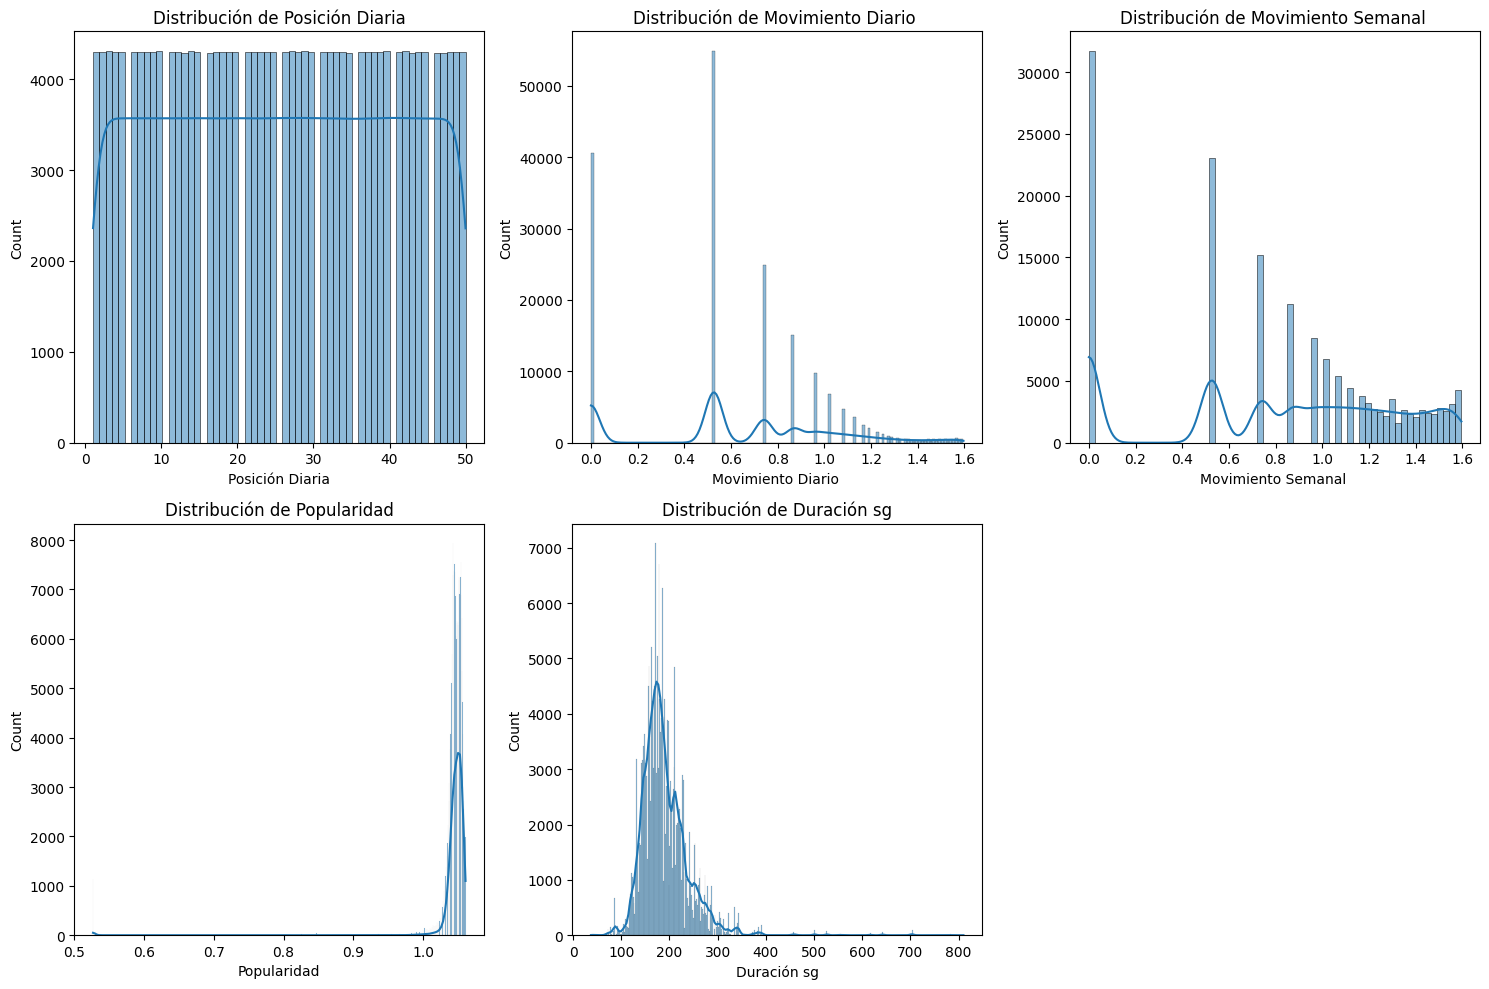

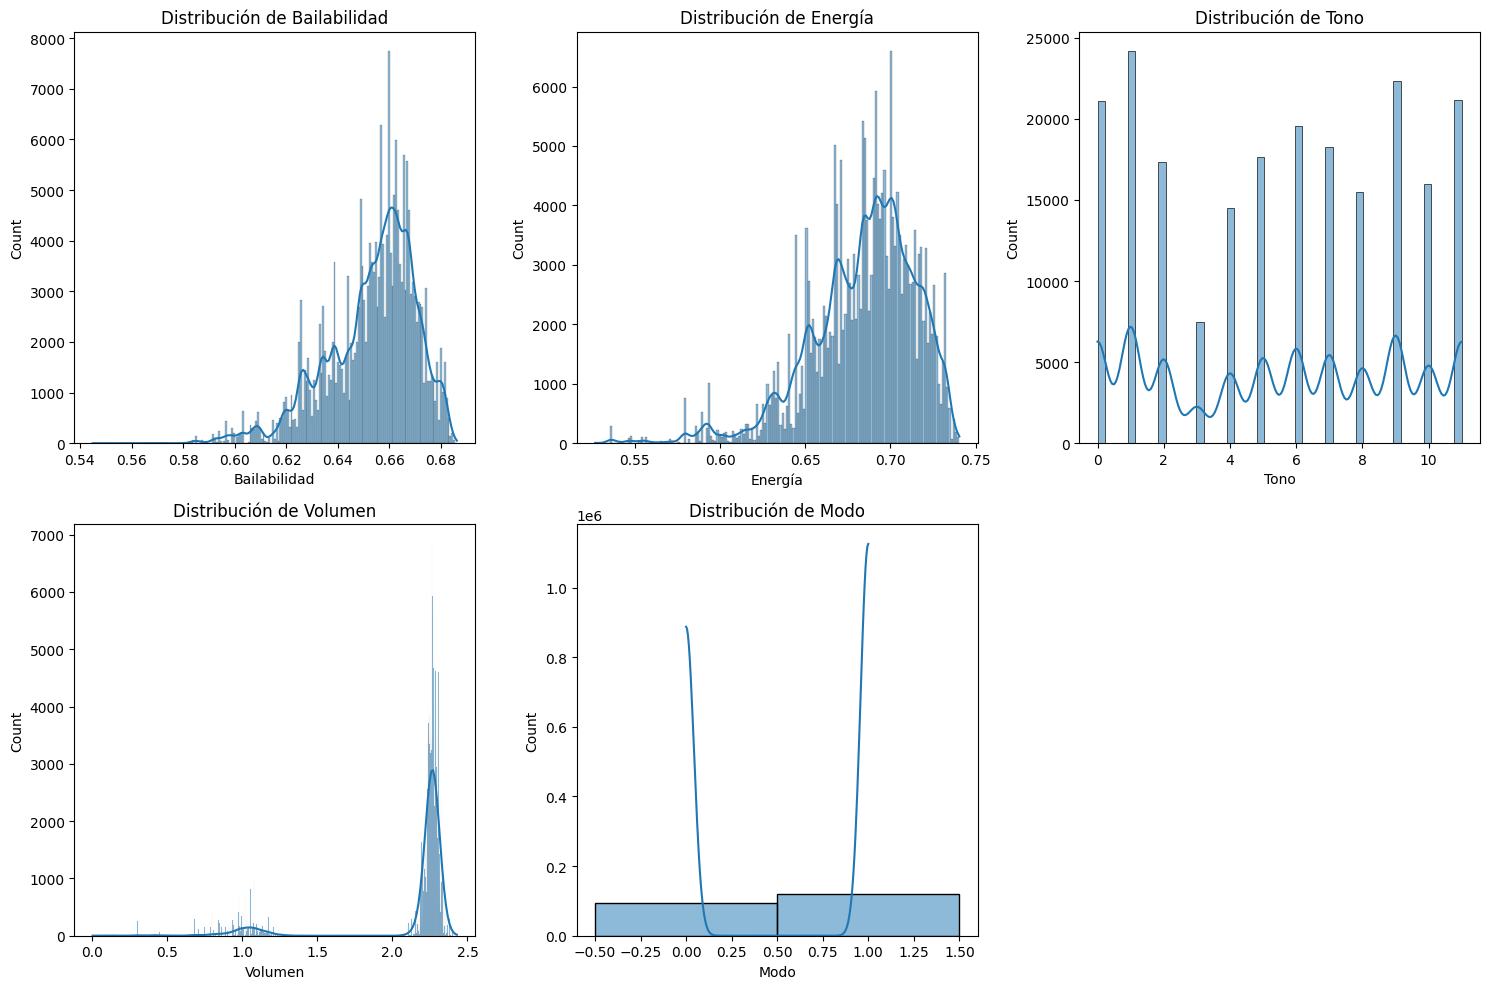

KeyboardInterrupt: 

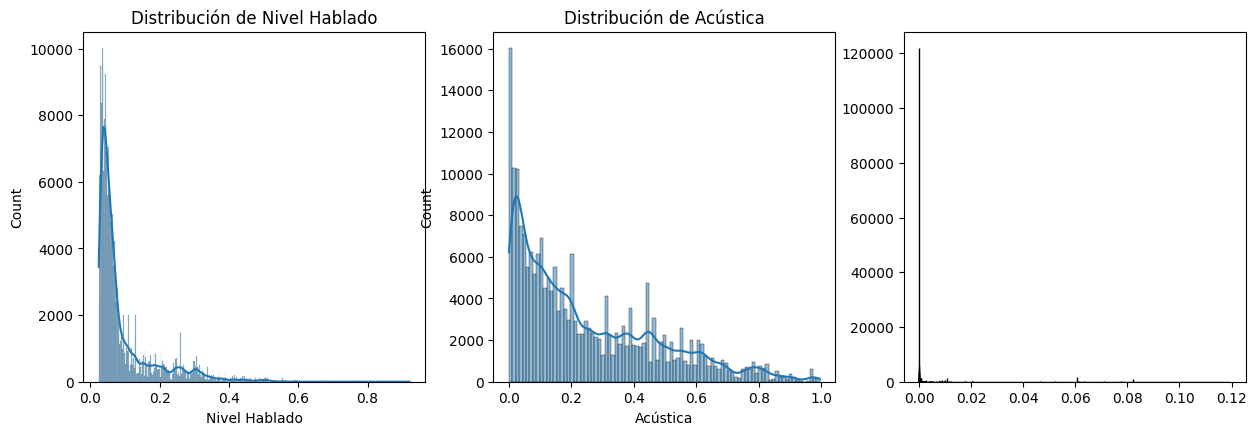

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


group1 = ['Posición Diaria', 'Movimiento Diario ', 'Movimiento Semanal ', 'Popularidad', 'Duración sg']
group2 = ['Bailabilidad', 'Energía', 'Tono', 'Volumen', 'Modo']
group3 = ['Nivel Hablado', 'Acústica', 'Instrumentalidad', 'Viveza', 'Valencia']
group4 = ['Tempo', 'Compás']


def plot_grouped_distributions(group):
    plt.figure(figsize=(15, 10))
    for i, var in enumerate(group, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df_canciones[var], kde=True)
        plt.title(f'Distribución de {var}')
    plt.tight_layout()
    plt.show()


plot_grouped_distributions(group1)
plot_grouped_distributions(group2)
plot_grouped_distributions(group3)
plot_grouped_distributions(group4)


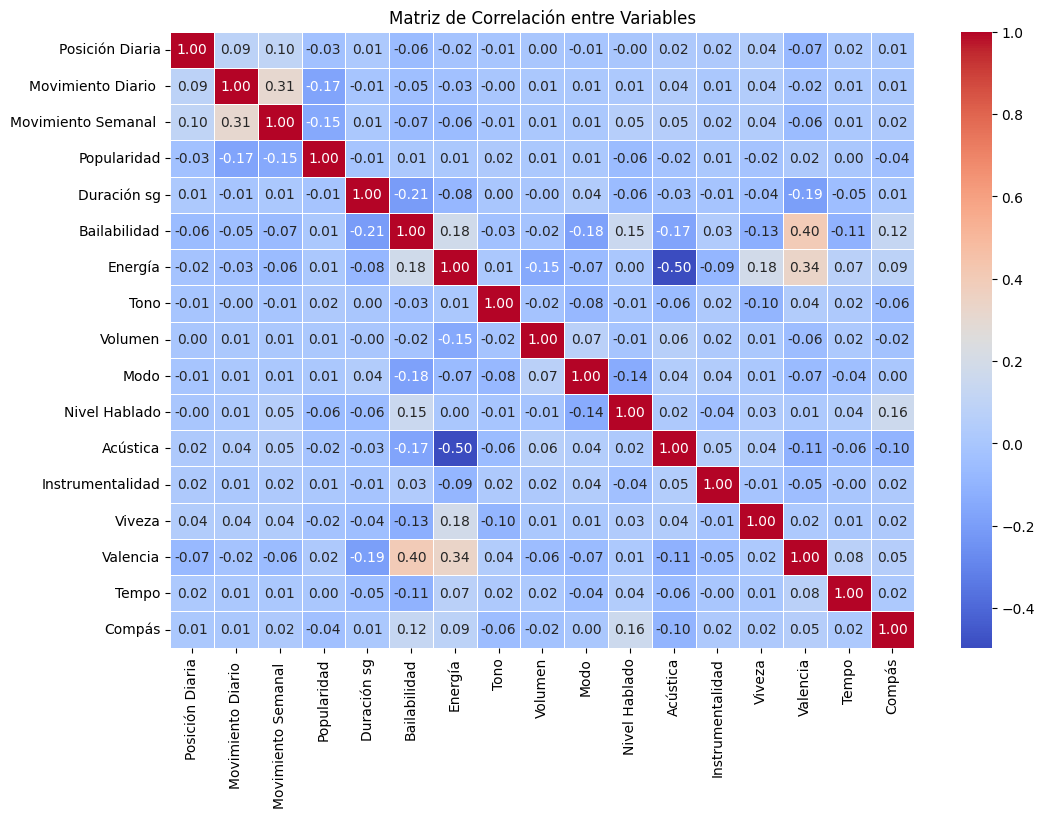

In [ ]:

correlation_matrix = df_canciones[variables_].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()
